
## Project:  Allstate Claims Severity
#### Author:   Joshep Downs, James Peng, Megan Pera, Diana Rodenberger 
#### Purpose:  Predicting cost and severity of claims for AllState
#### Created:  10/29/2016

### Team name in Kaggle: UCB_207_1

## Link to Leaderboard
https://www.kaggle.com/c/allstate-claims-severity/leaderboard


In [1]:
%matplotlib inline
import unittest

# General libraries.
import re, os, sys
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction import 
from sklearn import preprocessing

from sklearn.utils import shuffle

from sklearn.metrics import mean_absolute_error

from sklearn import linear_model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

## Preprocessing train set

 1) Extract data and load into dataframe
 
 2) Create dummy variables for categorical variables
 
 3) Transform the variable 'loss'
 
 4) Create training datasets and development datasets.

In [2]:

df_data = pd.read_csv('./data_in/train.csv')
df_data.shape

(188318, 132)

In [3]:
#split data frame into categorical variables, continous variables (including all 'contx' variables and 'loss') and ids


#separate categorical variables & continous variables.
cat_cols=[]
cont_cols=[]
for c in df_data.columns:
    if c.find('cat') >=0: # -1: substring not found, >=0, starting index
        cat_cols.append(c)
    elif c.find('cont')>=0:
        cont_cols.append(c)

df_cont_vars = df_data[cont_cols]
        
#convert categorical variables into dummy variables
df_dummy_vars=pd.get_dummies(df_data[cat_cols])

#create dataset with predictors
X = pd.concat([df_dummy_vars, df_cont_vars], axis=1)
#create dataset with dependent variable
y = np.log10(df_data.loss)
#create additioanl dataset with claim ids
id = df_data.id


X_train, X_dev, y_train, y_dev, id_train, id_dev = train_test_split( X, y, id, test_size=0.33, random_state=1)

In [4]:
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_dev shape: ',X_dev.shape)
print('y_dev shape: ',y_dev.shape)


X_train shape:  (126173, 1153)
y_train shape:  (126173,)
X_dev shape:  (62145, 1153)
y_dev shape:  (62145,)


In [5]:
X_train.head(2)

,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat4_A,cat4_B,cat5_A,cat5_B,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
18739,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.380560,0.608838,0.546949,0.45289,0.42289,0.55533,0.511698,0.557380,0.642600,0.221177
155434,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.568839,0.439206,0.407462,0.45883,0.46853,0.52221,0.441763,0.443374,0.324464,0.340194


### Data Exploration of Continous Variables

More work needs to be done in this section

1) Check the distribution.

2) Check for correlation.

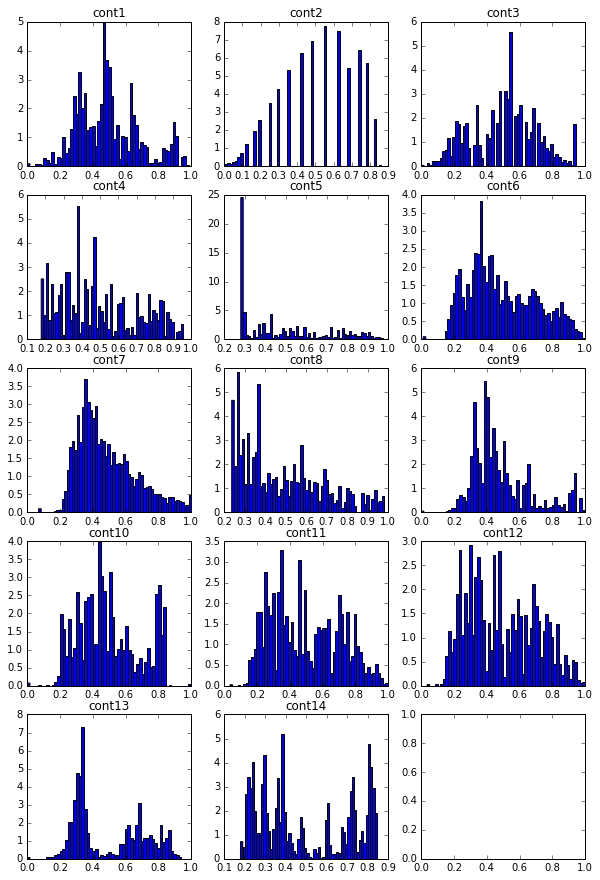

In [6]:
#function to plot histograms of continous variables
def PlotHisContinousVars(df):

    plt.subplots(5,3, figsize=(10,15))
    jj = 0
    for column_name in df.columns:
        jj+=1
        plt.subplot(5,3,jj).hist(df[column_name],normed=True, bins=60)
        plt.subplot(5,3,jj).set(title=column_name)
    plt.show()
 

PlotHisContinousVars(df_cont_vars)


Plot dependent variable

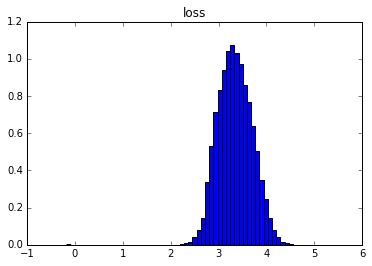

In [10]:
plt.cla()
plt.subplot(1,1,1).hist(y_train,normed=True, bins=60)
plt.subplot(1,1,1).set(title='loss')
plt.show()

#### TODO: more data exploration of continous variables

### Model 1: Linear Regression with dummy variables using RIDGE

We will try 3 different values of alpha

TODO: Find optimal values of alpha and other hyper-parameters

In [16]:
from sklearn.linear_model import LinearRegression

# regularization methos
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [17]:
### function to define Mean Absolute Error

def EstimateMEARidge(alpha, X_train,y_train,X_test, y_test):
    
    lr = linear_model.Ridge(alpha=alpha, normalize=True)

    # Train the model using the training sets
    lr.fit(X_train, y_train)

    # predict dev set
    preds = lr.predict(X_test)
   
    s = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error')
    
    print ('Regression - Ridge with alpha: ', alpha)

    print('mean_absolute_error on training data: {0}'.format(s))

    mae = mean_absolute_error(y_test, preds)
    print('mean_absolute_error on dev data {0}'.format(mae))
    

#### alpha =0.00001

In [18]:
pd.options.mode.chained_assignment = None

EstimateMEARidge(alpha=0.00001,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

Regression - Ridge with alpha:  1e-05
mean_absolute_error on training data: [-0.19243734 -0.19133839 -0.19246453]
mean_absolute_error on dev data 0.19163931525070824


#### alpha =0.001

In [19]:
pd.options.mode.chained_assignment = None

EstimateMEARidge(alpha=0.001,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

Regression - Ridge with alpha:  0.001
mean_absolute_error on training data: [-0.19241614 -0.19134146 -0.19247004]
mean_absolute_error on dev data 0.1916296757533237


#### alpha =0.1

In [20]:
pd.options.mode.chained_assignment = None


EstimateMEARidge(alpha=0.1,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

Regression - Ridge with alpha:  0.1
mean_absolute_error on training data: [-0.19251016 -0.19139904 -0.1925847 ]
mean_absolute_error on dev data 0.19171244952642735


The following are the baseline scores submitted for the competition

mean_absolute_error on training data: [-0.19872471 -0.19753498 -0.19821047]

mean_absolute_error on test data 0.198086964004104


## PCA

Create a model for regression that uses PCA components for dummy variables + continous variables. Here are the steps to run this model:

1) Create a dataset with PCA components of dummy variables. 

2) Create a dataset with just continous variables. 

3) Create a combined dataset using datasets from step 1 and 2.

4) Do steps 1-3 for training data and dev data.

5) Run regression.

### Pre-processing: Find the number of components that explains most of the variance.

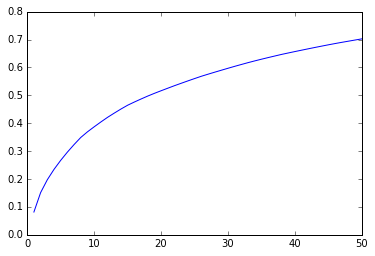

Total variance explained by first PCA component: 0.081600 

Total variance explained by 8 PCA components: 0.369046 

Total variance explained by 50 PCA components: 0.702367 



In [21]:

from sklearn.decomposition import PCA
def P1():

    pca = PCA(n_components=50)
    pca.fit(X_train)
    cum_vars=[]
    components=[]
    cumulative_var=0
    for ii in range(len(pca.explained_variance_ratio_)):
        cumulative_var+=pca.explained_variance_ratio_[ii]
        cum_vars.append(cumulative_var)
        components.append(ii+1)
        
    plt.plot(components, cum_vars)
    #plt.title('Total variance explained by first K components')
    plt.show()
    return cum_vars

cum_vars=P1()

print('Total variance explained by first PCA component: %0.6f \n' % cum_vars[0])
print('Total variance explained by 8 PCA components: %0.6f \n' % cum_vars[8])
print('Total variance explained by 50 PCA components: %0.6f \n' % cum_vars[49])

##### Since most of the variance is explained by one component, let's run PCA with two components

In [22]:

#identify continous and dummy variables
cols_dummy_vars = list(df_dummy_vars.columns)
cols_cont_vars = list(df_cont_vars.columns)

#create a dataset with dummy variables for training data
df_train_dummy_vars=X_train[cols_dummy_vars]

#create a dataset with continous variables for training data
df_train_cont_vars=X_train[cols_cont_vars]

#create two datasets with continous and dummy variables for dev data
df_dev_cont_vars=X_dev[cols_cont_vars]
df_dev_dummy_vars=X_dev[cols_dummy_vars]


#Run PCA with two components
pca = PCA(n_components=50)
train_data_pca = pca.fit_transform(df_train_dummy_vars)
dev_data_pca = pca.transform(df_dev_dummy_vars)

#create dataframes with pca components
df_train_data_pca = pd.DataFrame({'comp1':train_data_pca[:,0],'comp2':train_data_pca[:,1]}, index=list(id_train.index))
df_dev_data_pca = pd.DataFrame({'comp1':dev_data_pca[:,0],'comp2':dev_data_pca[:,1]}, index=list(id_dev.index))


##### Create a new training set and dev set with pca components (for dummy variables) and continous variables

In [23]:
X_train_pca = pd.concat([df_train_data_pca, df_train_cont_vars], axis=1)

In [24]:
X_dev_pca = pd.concat([df_dev_data_pca, df_dev_cont_vars], axis=1)

In [25]:
#checks

print(X_train.shape)
print(df_train_cont_vars.shape)
print(df_train_dummy_vars.shape)

print(df_train_data_pca.shape)
print(X_train_pca.shape)

(126173, 1153)
(126173, 14)
(126173, 1139)
(126173, 2)
(126173, 16)


### Run regression models with 50 PCA components

In [26]:
EstimateMEARidge(alpha=0.00001,X_train=X_train_pca,y_train=y_train,X_test=X_dev_pca, y_test=y_dev)

Regression - Ridge with alpha:  1e-05
mean_absolute_error on training data: [-0.25526133 -0.25425281 -0.25494233]
mean_absolute_error on dev data 0.254853272632055


In [27]:
EstimateMEARidge(alpha=0.1,X_train=X_train_pca,y_train=y_train,X_test=X_dev_pca, y_test=y_dev)

Regression - Ridge with alpha:  0.1
mean_absolute_error on training data: [-0.25627621 -0.25517411 -0.25598107]
mean_absolute_error on dev data 0.255934026419639


### Predict the Test Dataset

 1) Extract data and load into dataframe
 
 2) Create dummy variables for categorical variables
 
 3) Predict loss based on 'best' model previously found : Ridge with alpha= 0.00001


In [12]:
df_test = pd.read_csv('./data_in/test.csv')

In [13]:
test_cat_cols=[]
test_cont_cols=[]
for c in df_test.columns:
    if c.find('cat') >=0: # -1: substring not found, >=0, starting index
        test_cat_cols.append(c)
    elif c.find('cont')>=0:
        test_cont_cols.append(c)

test_df_cont_vars = df_test[test_cont_cols]
        
#convert categorical variables into dummy variables
test_df_dummy_vars=pd.get_dummies(df_test[test_cat_cols])

#create dataset with predictors
X_test = pd.concat([test_df_dummy_vars, test_df_cont_vars], axis=1)
id_test = df_test.id


In [15]:

print('num columns in test: ', X_test.shape[1])
print('num columns in train: ', X_train.shape[1])

num columns in test:  1116
num columns in train:  1153


## Important note:

The following code does not work because X_train has less variables than X_test.
I assume that the train data has more categories in some categorical variables than the test data; thus, when we tranform the categorical variables in the test data to dummy variables then we get less dummy variables than in the train set. 

TODO:
I need to fix this, probably just adding empty values to those dummy variables that only exist in the train data.


In [ ]:
#id_train, x_train,  y_train = shuffle( df_train.id, df_train[col] , df_train.loss, random_state=0)

pd.options.mode.chained_assignment = None

lr = linear_model.Ridge(alpha=0.00001, normalize=True)

lr.fit(X_train, y_train)

#use same linear model previously fit with training data
y_test_log_pred = lr.predict(X_test)

# convert from log10 scale to linear scale 
y_test_pred = np.power(10, y_test_log_pred)

# assamble the final dataset
y_test_predicted_loss=pd.DataFrame(id_test)

y_test_pred_df=pd.DataFrame({"loss": y_test_pred})

y_test_predicted_loss=pd.concat([y_test_predicted_loss,y_test_pred_df], axis=1)


#check final output
print("number of ids: ", len(id_test))
print("number of rows in predicted test set: ",len(y_test_predicted_loss) )

#create csv file to submit
y_test_predicted_loss.to_csv('./data_out/AllState_lr_ridge.csv', encoding='utf-8', index=False)